<a href="https://colab.research.google.com/github/ElizabethB111/MESA-8410-Final-Project/blob/main/6_Track_2_Station_Level_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Performing Station Level Dataset Modeling**
Modeling realtionships between key station characteristics and shifts in perception, specifically police sensitivity to women reported crimes, among survey responders from baseline to endline

Creating and Leveraging a Station Level Dataset for the Model Fitting.


Import Required Libraries

In [ ]:
# IMPORT LIBRARIES BELOW
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a special library for working with tables:
from tabulate import tabulate


### Reading in the data
The data is police_outer_person_data.csv (created in separate notebook "Final_Project_Merging_Data_for_Q5_Analysis_ipynb")

Also reads in the station personnel data

In [ ]:
# the code below allows you to access your Google Drive.
from google.colab import drive

drive.mount('/content/drive')

# root_dir is the path to your My_Drive folder.
root_dir = "/content/drive/My Drive/"

# Store the dataframes in the following directory.
data_folder = root_dir + "Colab Notebooks/Final Project/Data/"

# the CSV data file created in the Q5_data_prep notebook is located here
# contains an outer join of the baseline and full police survey data with the police personnel data appended to each row
inputfile1 = "/content/drive/My Drive/Colab Notebooks/Final Project/Data/police_outer_person_data.csv"
inputfile2 = "/content/drive/My Drive/Colab Notebooks/MPP Science Replication Package/Data/Police survey/csv/police_station personnel data.dta.csv"


# Read the CSV file into a dataframes
police_person_data = pd.read_csv(inputfile1)
police_station_data = pd.read_csv(inputfile2)


Mounted at /content/drive


### Initial Sample Records and Descriptive Stats of the Data


In [ ]:
# Use `head()` to get an overview of the first few records in the respondent level dataset
print ('Police Survey + Personnel Data Records')
police_person_data.head(5)

Police Survey + Personnel Data Records


,Unnamed: 0_x,b_uid,gender_x,b_pol_impt_x,b_thana_impt_x,b_wcase_x,b_effective_x,b_helpful_x,b_add_officer_x,b_add_female_x,...,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
2,125.0,2141762.0,m,0.0,0.0,enough attention,very effective,helpful,more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
3,121.0,2141764.0,m,0.0,0.0,too much attention,very effective,very helpful,much more effective,much less effective,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,9.0,3.77907,2.16,0.0,1.0,3.333333,2.0,NaN,NaN


In [ ]:
# Use `head()` to get an overview of the first few records of the station level dataset
print ('Police Station Personnel Data Records')
police_station_data.head(5)

Police Station Personnel Data Records


,Unnamed: 0,e_total_surveyed,e_female_surveyed,e_male_surveyed,ps_code,e_total_staff,e_female_staff,e_total_officers,e_female_officers,e_male_staff,...,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,0,12.0,1.0,11.0,1001.0,48.0,6.0,11.0,1.0,42.0,...,1000.0,9.0,2.916667,2.20,0.0,1.0,3.818182,3.272727,6.000000,3.000000
1,1,11.0,0.0,11.0,1002.0,29.0,2.0,6.0,0.0,27.0,...,1000.0,NaN,1.545454,NaN,0.0,0.0,2.454546,1.727273,NaN,1.000000
2,2,11.0,1.0,10.0,1003.0,79.0,6.0,13.0,2.0,73.0,...,1000.0,NaN,1.090909,NaN,0.0,0.0,7.300000,4.900000,3.000000,3.500000
3,3,10.0,2.0,8.0,1004.0,33.0,3.0,7.0,1.0,30.0,...,1000.0,7.0,3.897297,2.03,1.0,0.0,3.000000,1.800000,1.000000,1.333333
4,4,12.0,3.0,9.0,1005.0,32.0,7.0,4.0,2.0,25.0,...,1000.0,9.0,4.157658,2.20,0.0,1.0,2.777778,2.500000,2.333333,1.500000


In [ ]:
# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Survey + Personnel Data:",police_person_data.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_b_uid_keys = police_person_data['b_uid'].nunique()
distinct_uid_keys = police_person_data['uid'].nunique()
distinct_pscode_keys = police_person_data['ps_code'].nunique()

print("Distinct b_uid keys:", distinct_b_uid_keys)
print("Distinct uid keys:", distinct_uid_keys)
print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

police_person_data.info(verbose=True)

Rows and Column Count, Police Survey + Personnel Data: (2843, 108)
Distinct b_uid keys: 1950
Distinct uid keys: 2032
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 108 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    Unnamed: 0_x              float64
 1    b_uid                     float64
 2    gender_x                  object 
 3    b_pol_impt_x              float64
 4    b_thana_impt_x            float64
 5    b_wcase_x                 object 
 6    b_effective_x             object 
 7    b_helpful_x               object 
 8    b_add_officer_x           object 
 9    b_add_female_x            object 
 10   b_female_better_x         object 
 11   b_sensitivity_x           float64
 12   uid                       float64
 13   attrit                    float64
 14   ps_code_x                 float64
 15   population_x              float64
 16   urban_x               

The dataframe has b_uid for respondents and baseline and uid for respondents at endline. Police personnel data is duplicated across each record and is at the ps_code level.   Next, we limit the data to the percpetion and station characterisitic data columns required for EDA.

As a next step below,

1. limit the responsder data to responders who responded at both baseline and endline.

2.  Create 2 potential target variables for modeling including change if sensitivity from baseline to endline (absolute difference in sensitivity score) and the % incidence of female employees at the station level (for use as a predictor variable.

In [ ]:
# Check the number of rows and columns with `shape`
print("Rows and Column Count, Police Station Level Data:",police_station_data.shape)

# Confirming Distinct Row Keys on Data Set -> Should Match Row Count;

distinct_pscode_keys = police_station_data['ps_code'].nunique()

print("Distinct PS Code keys:", distinct_pscode_keys)

# Check Data Types of Columns in the Dataframe;

police_station_data.info(verbose=True)

Rows and Column Count, Police Station Level Data: (180, 44)
Distinct PS Code keys: 180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              180 non-null    int64  
 1   e_total_surveyed        180 non-null    float64
 2   e_female_surveyed       180 non-null    float64
 3   e_male_surveyed         180 non-null    float64
 4   ps_code                 180 non-null    float64
 5   e_total_staff           180 non-null    float64
 6   e_female_staff          180 non-null    float64
 7   e_total_officers        180 non-null    float64
 8   e_female_officers       180 non-null    float64
 9   e_male_staff            180 non-null    float64
 10  e_male_officers         180 non-null    float64
 11  e_female_sho            180 non-null    float64
 12  b_total_staff           180 non-null    float64
 13  b_female

In [ ]:
# New dataframe at the station level -> taking means of the respondent sensitivity scores and differences at the station level.

station_level_sensitivity_df = police_person_data.groupby(['ps_code']).agg({'b_sensitivity_x':'mean','e_sensitivity':'mean'})

print(station_level_sensitivity_df)


         b_sensitivity_x  e_sensitivity
ps_code                                
1001.0          7.300000       8.916667
1002.0          7.454545       7.818182
1003.0          9.272727       7.727273
1004.0          8.153846       6.800000
1005.0         10.333333       6.833333
...                  ...            ...
12176.0         5.545455      11.545455
12177.0         7.000000       7.900000
12178.0         6.636364      10.000000
12179.0         6.400000       8.727273
12180.0         6.000000       6.727273

[180 rows x 2 columns]


In [ ]:
# Creating New Columns with difference in baseline to endline sensitivity scores and flag denoting increase in scores from baseline to endline;

station_level_sensitivity_df['sensitivity_diff'] = station_level_sensitivity_df['e_sensitivity'] - station_level_sensitivity_df['b_sensitivity_x']

station_level_sensitivity_df['sensitivity_inc'] = (station_level_sensitivity_df['e_sensitivity'] - station_level_sensitivity_df['b_sensitivity_x']) > 0

print(station_level_sensitivity_df)

         b_sensitivity_x  e_sensitivity  sensitivity_diff  sensitivity_inc
ps_code                                                                   
1001.0          7.300000       8.916667          1.616667             True
1002.0          7.454545       7.818182          0.363636             True
1003.0          9.272727       7.727273         -1.545455            False
1004.0          8.153846       6.800000         -1.353846            False
1005.0         10.333333       6.833333         -3.500000            False
...                  ...            ...               ...              ...
12176.0         5.545455      11.545455          6.000000             True
12177.0         7.000000       7.900000          0.900000             True
12178.0         6.636364      10.000000          3.363636             True
12179.0         6.400000       8.727273          2.327273             True
12180.0         6.000000       6.727273          0.727273             True

[180 rows x 4 columns]


In [ ]:
# Append Police Personnel Data Onto Each Record of Police Outer;

station_level_full = pd.merge(station_level_sensitivity_df, police_station_data, on = 'ps_code', how = "left")

# Look at the dimensions of the data after merging
print("station level dataframe dimensions (rows, cols): ", station_level_full.shape)

station level dataframe dimensions (rows, cols):  (180, 48)


Next step:  Further reduce dataframe to columns used for modeling.

Dataframe now contains the police survey perception data at baseline ("b_ columns), at endline ("e_" attributes) and police station characteristics including urban flag, surrounding population size served, and staff size and gender composition

In [ ]:
# Creating New Columns with Ratio of Female Employees to Total Employees;

station_level_full['b_female_employee_ratio'] = (station_level_full['b_female_staff'] / station_level_full['b_total_staff'])

station_level_full['e_female_employee_ratio'] = (station_level_full['e_female_staff'] / station_level_full['e_total_staff'])

In [ ]:
# For numeric columns (the default selection), round to 2 decimal places for better readability.
numeric_summary_stats = station_level_full.describe().round(2)
# Print the numeric summaries:
print("Numeric Summary Statistics: (vertical)")
display(numeric_summary_stats)

# For categorical columns, include 'object' (strings), 'category', and 'bool' (true/false) types.
print("\nCategorical Summary Statistics: (vertical)")
categorical_summary_stats = station_level_full.describe(include = ['object', 'category', 'bool'])
# Print the categorical summaries:
display(categorical_summary_stats)

# Transpose the summary statistics tables (turn them sideways) to make them more readable, using .T
numeric_summary_stats_transposed = numeric_summary_stats.T
categorical_summary_stats_transposed = categorical_summary_stats.T

# Display the transposed summary statistics
print("\nNumeric Summary Statistics: (transposed)")
display(numeric_summary_stats_transposed)

print("\nCategorical Summary Statistics: (transposed)")
display(categorical_summary_stats_transposed)

Numeric Summary Statistics: (vertical)


,ps_code,b_sensitivity_x,e_sensitivity,sensitivity_diff,Unnamed: 0,e_total_surveyed,e_female_surveyed,e_male_surveyed,e_total_staff,e_female_staff,...,training_score,comm_outreach_strength,regular_whd,women_whd,e_male_weight,b_male_weight,e_female_weight,b_female_weight,b_female_employee_ratio,e_female_employee_ratio
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,...,180.00,119.00,180.00,180.00,180.00,180.00,164.00,168.00,180.00,180.00
mean,5857.17,7.04,7.55,0.51,89.50,10.89,1.28,9.61,53.83,5.20,...,2.10,1.80,0.34,0.33,4.77,4.16,3.71,2.01,0.07,0.10
std,3118.11,1.47,1.84,2.33,52.11,1.19,0.74,1.12,23.94,3.03,...,1.24,0.75,0.47,0.47,2.24,2.03,2.34,1.03,0.04,0.05
min,1001.00,3.67,4.33,-6.10,0.00,7.00,0.00,6.00,17.00,0.00,...,0.00,0.00,0.00,0.00,1.50,1.00,1.00,1.00,0.00,0.00
25%,3045.75,6.10,6.35,-0.95,44.75,10.00,1.00,9.00,33.00,3.00,...,1.18,1.20,0.00,0.00,2.88,2.36,2.00,1.00,0.04,0.07
50%,5090.50,6.91,7.18,0.35,89.50,11.00,1.00,10.00,53.00,5.00,...,2.17,2.10,0.00,0.00,4.47,3.90,3.00,2.00,0.07,0.09
75%,8135.25,7.91,8.64,2.08,134.25,12.00,2.00,10.00,71.25,7.00,...,3.27,2.20,1.00,1.00,6.20,5.70,5.00,2.50,0.09,0.12
max,12180.00,11.78,13.75,7.50,179.00,14.00,3.00,12.00,125.00,15.00,...,4.58,3.33,1.00,1.00,13.11,9.44,15.00,6.00,0.18,0.25



Categorical Summary Statistics: (vertical)


,sensitivity_inc,urban,treatment,group
count,180,180,180,180
unique,2,2,2,3
top,True,Rural,Treatment,regular mhd
freq,106,102,120,61



Numeric Summary Statistics: (transposed)


,count,mean,std,min,25%,50%,75%,max
ps_code,180.0,5857.17,3118.11,1001.00,3045.75,5090.50,8135.25,12180.00
b_sensitivity_x,180.0,7.04,1.47,3.67,6.10,6.91,7.91,11.78
e_sensitivity,180.0,7.55,1.84,4.33,6.35,7.18,8.64,13.75
sensitivity_diff,180.0,0.51,2.33,-6.10,-0.95,0.35,2.08,7.50
Unnamed: 0,180.0,89.50,52.11,0.00,44.75,89.50,134.25,179.00
e_total_surveyed,180.0,10.89,1.19,7.00,10.00,11.00,12.00,14.00
e_female_surveyed,180.0,1.28,0.74,0.00,1.00,1.00,2.00,3.00
e_male_surveyed,180.0,9.61,1.12,6.00,9.00,10.00,10.00,12.00
e_total_staff,180.0,53.83,23.94,17.00,33.00,53.00,71.25,125.00
e_female_staff,180.0,5.20,3.03,0.00,3.00,5.00,7.00,15.00



Categorical Summary Statistics: (transposed)


,count,unique,top,freq
sensitivity_inc,180,2,True,106
urban,180,2,Rural,102
treatment,180,2,Treatment,120
group,180,3,regular mhd,61


For First Model Fit:  Only Keep Records with non-missing sensitivity difference and convert the urban/rural field to dummy (1/0) variables for model fitting.

In [ ]:
# Converting categorical variables to dummy variables

station_level_full = pd.get_dummies(station_level_full, dtype=int)

station_level_full.head()

,ps_code,b_sensitivity_x,e_sensitivity,sensitivity_diff,sensitivity_inc,Unnamed: 0,e_total_surveyed,e_female_surveyed,e_male_surveyed,e_total_staff,...,b_female_weight,b_female_employee_ratio,e_female_employee_ratio,urban_Rural,urban_Urban,treatment_Control,treatment_Treatment,group_control,group_regular mhd,group_women officers
0,1001.0,7.300000,8.916667,1.616667,True,0,12.0,1.0,11.0,48.0,...,3.000000,0.076923,0.125000,1,0,0,1,0,0,1
1,1002.0,7.454545,7.818182,0.363636,True,1,11.0,0.0,11.0,29.0,...,1.000000,0.050000,0.068966,1,0,1,0,1,0,0
2,1003.0,9.272727,7.727273,-1.545455,False,2,11.0,1.0,10.0,79.0,...,3.500000,0.125000,0.075949,1,0,1,0,1,0,0
3,1004.0,8.153846,6.800000,-1.353846,False,3,10.0,2.0,8.0,33.0,...,1.333333,0.181818,0.090909,1,0,0,1,0,1,0
4,1005.0,10.333333,6.833333,-3.500000,False,4,12.0,3.0,9.0,32.0,...,1.500000,0.107143,0.218750,1,0,0,1,0,0,1


First Model:  Fit using the "baseline" timeperiod characteristics

In [ ]:
# Create X containing Baseline Predictor Variables

X = station_level_full[['b_total_staff','b_female_employee_ratio','urban_Urban','treatment_Treatment']]

X.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
0,39.0,0.076923,0,1
1,20.0,0.050000,0,0
2,56.0,0.125000,0,0
3,22.0,0.181818,0,1
4,28.0,0.107143,0,1


First Model:  Scale the predictor variables before fitting the linear model.

Set the predictor variable list to the dataframe X.

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['b_total_staff','b_female_employee_ratio','urban_Urban','treatment_Treatment']

X.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
0,-0.305748,0.168264,-0.874475,0.707107
1,-1.203309,-0.513634,-0.874475,-1.414214
2,0.497333,1.385940,-0.874475,-1.414214
3,-1.108829,2.825011,-0.874475,0.707107
4,-0.825388,0.933660,-0.874475,0.707107


Set Sensitivity_Diff to dataframe y.

In [ ]:
y = station_level_full['sensitivity_diff']

Execute test/ learn / fitting split steps from sklearn.

In [ ]:
# import the function train_test_split from the model_selection module of scikit_learn
from sklearn.model_selection import train_test_split

In [ ]:
# use list unpacking to assign the return values from train_test_split
# to variables. Nw we can train the model with x_train and y_train and then
# test with x_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2001)

In [ ]:
# import LinearRegression from the linear_model module in scikit-learn
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
model = LinearRegression()

# train the model using fit
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# call predict on the test data to generate a set of predictions
predictions = model.predict(X_test)

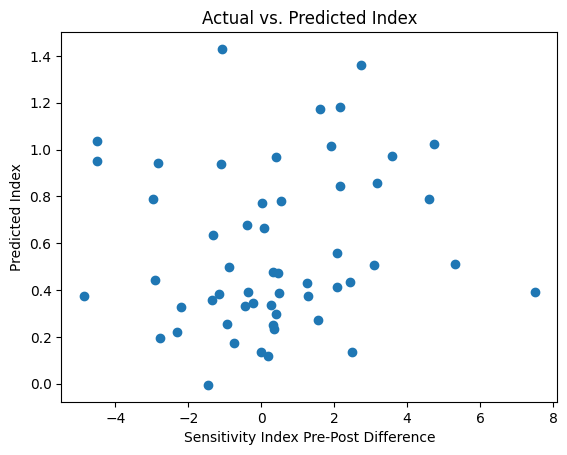

In [ ]:
# make a scatter plot to compare the actual prices vs. the predicted prices
_ = plt.scatter(y_test, predictions)
_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

A directional, but not precise, relationship appears.

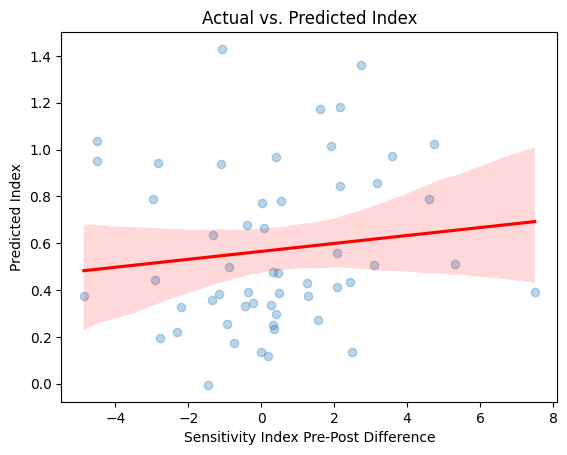

In [ ]:
_ = sns.regplot(x=y_test,
                y=predictions,
                scatter_kws={'alpha':0.3},  # make the scatter points have some transparency
                line_kws={'color':'red'})   # change regression line color

_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Positive assocation does appear between actuals and predicted.  Appears that the predicted difference is much more concentrated (much less spread) than what is observed in the actuals.   Need to research typical causes of this ....

In [ ]:
# compute R-squared for our regression model using r2-score()
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)


0.005905562137654252


Very low R2 and less than 0.02.

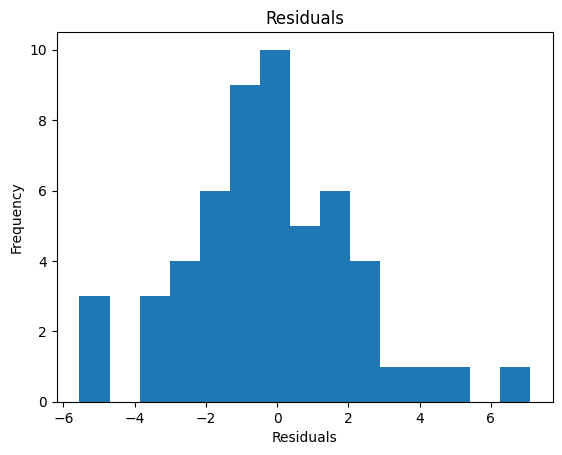

In [ ]:
_ = plt.hist(y_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

Good normal distribution of residuals with the highest count being centered on zero.

In [ ]:
# first import the metrics module
from sklearn import metrics

# then call the mean_absolute_error function
mae = metrics.mean_absolute_error(y_test, predictions)

# call mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)

# root mean squared error is the square root of mean_squared_error
# you could do that by hand or call metrics.root_mean_squared_error()
rmse = metrics.root_mean_squared_error(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1.8234759277501014
MSE: 5.982502061379965
RMSE: 2.445915383119368


Found and executed code to generate OLS output to examine paramater estimates and p values.  Need to figure out how to execute this on the 'training' data vs.  all observations.

In [ ]:
import statsmodels.api as sm

X = X.reset_index(drop=True)  # Reset index of X and drop the old index
y = y.reset_index(drop=True)  # Reset index of y and drop the old index

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       sensitivity_diff   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              1.339
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                       0.257
Time:                        17:05:09   Log-Likelihood:                         -408.48
No. Observations:                 180   AIC:                                      825.0
Df Residuals:                     176   BIC:                                      837.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

2 of the predictor attributes are showing p values < .05  (total staff at baseline and % female employees at baseline).  Both have a negative correlation with changes in sensitivity.   Next block of code executes the same model but for the endline attributes -> to see if the relationship holds with the same type of station characteristics collected at endline.  

In [ ]:
# Create X containing Baseline Predictor Variables
# Now Using the Endline Variables

X2 = station_level_full[['e_total_staff', 'e_female_employee_ratio','urban_Urban','treatment_Treatment']]

X2.head()

,e_total_staff,e_female_employee_ratio,urban_Urban,treatment_Treatment
0,48.0,0.125000,0,1
1,29.0,0.068966,0,0
2,79.0,0.075949,0,0
3,33.0,0.090909,0,1
4,32.0,0.218750,0,1


Scaling the predictor variable attributes ... this time using 'endline' characteristics.

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2))
X2.columns = ['e_total_staff', 'e_female_employee_ratio','urban_Urban','treatment_Treatment']

X2.head()

,e_total_staff,e_female_employee_ratio,urban_Urban,treatment_Treatment
0,-0.244135,0.603229,-0.874475,0.707107
1,-1.040075,-0.641492,-0.874475,-1.414214
2,1.054504,-0.486357,-0.874475,-1.414214
3,-0.872509,-0.154049,-0.874475,0.707107
4,-0.914400,2.685743,-0.874475,0.707107


Running Sklearn linear regression routines (renaming predictor and target variables to y2 and X2.

In [ ]:
y2 = station_level_full['sensitivity_diff']

In [ ]:
# use list unpacking to assign the return values from train_test_split
# to variables. Nw we can train the model with x_train and y_train and then
# test with x_test and y_test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2001)

In [ ]:
# import LinearRegression from the linear_model module in scikit-learn
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
model = LinearRegression()

# train the model using fit
model.fit(X2_train, y2_train)


LinearRegression()

In [ ]:
# call predict on the test data to generate a set of predictions
predictions = model.predict(X2_test)

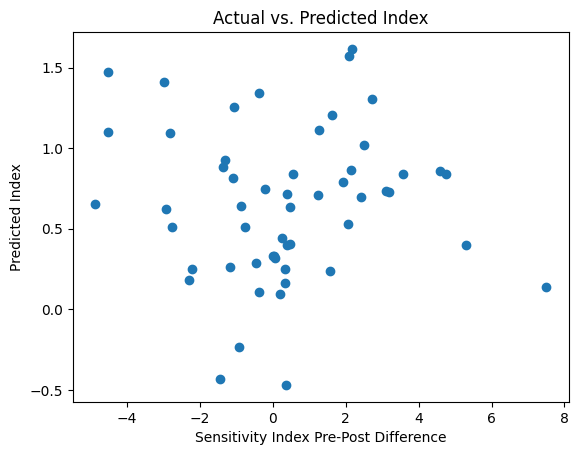

In [ ]:
# make a scatter plot to compare the actual prices vs. the predicted prices
_ = plt.scatter(y2_test, predictions)
_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Slight positive relationship between predicted and actuals (appears less correlated than the baseline model)

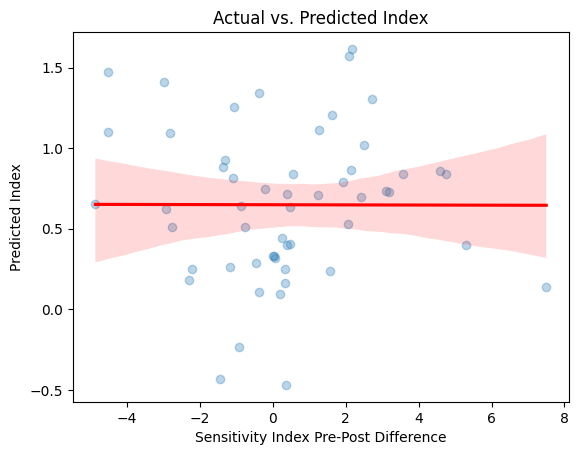

In [ ]:
_ = sns.regplot(x=y2_test,
                y=predictions,
                scatter_kws={'alpha':0.3},  # make the scatter points have some transparency
                line_kws={'color':'red'})   # change regression line color

_ = plt.xlabel("Sensitivity Index Pre-Post Difference")
_ = plt.ylabel("Predicted Index")
_ = plt.title("Actual vs. Predicted Index")

Slight positive relationship confirmed (but line is pretty flat).

In [ ]:
# compute R-squared for our regression model using r2-score()
from sklearn.metrics import r2_score
r2_2 = r2_score(y2_test, predictions)
print(r2_2)

-0.05261078776715933


VERY LOW R2.

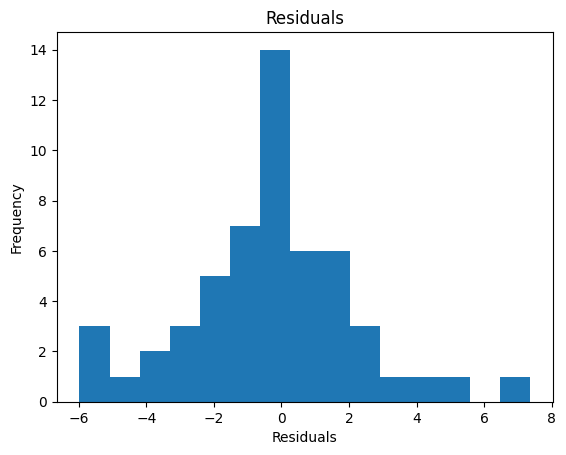

In [ ]:
_ = plt.hist(y2_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

Good concentration of residuals around 0.

In [ ]:
# first import the metrics module
from sklearn import metrics

# then call the mean_absolute_error function
mae = metrics.mean_absolute_error(y2_test, predictions)

# call mean_squared_error
mse = metrics.mean_squared_error(y2_test, predictions)

# root mean squared error is the square root of mean_squared_error
# you could do that by hand or call metrics.root_mean_squared_error()
rmse = metrics.root_mean_squared_error(y2_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1.820787092998805
MSE: 6.33465591175535
RMSE: 2.5168742343937947


In [ ]:
import statsmodels.api as sm

X2 = X2.reset_index(drop=True)  # Reset index of X and drop the old index
y2 = y2.reset_index(drop=True)  # Reset index of y and drop the old index

#add constant to predictor variables
x2 = sm.add_constant(X2)

#fit linear regression model
model = sm.OLS(y2, X2).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       sensitivity_diff   R-squared (uncentered):                   0.024
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.098
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                       0.359
Time:                        17:31:23   Log-Likelihood:                         -408.96
No. Observations:                 180   AIC:                                      825.9
Df Residuals:                     176   BIC:                                      838.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Consistency in the significance and direction (negative) for the % of staff that is female.   But the total_staff at endline is no longer significant and sign/direction of relationship switched.

In [ ]:
# Create X containing Baseline Predictor Variables

X3 = station_level_full[['b_total_staff', 'b_female_employee_ratio','urban_Urban','treatment_Treatment']]

X3.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
0,39.0,0.076923,0,1
1,20.0,0.050000,0,0
2,56.0,0.125000,0,0
3,22.0,0.181818,0,1
4,28.0,0.107143,0,1


In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X3 = pd.DataFrame(scaler.fit_transform(X3))
X3.columns = ['b_total_staff','b_female_employee_ratio','urban_Urban','treatment_Treatment']

X3.head()

,b_total_staff,b_female_employee_ratio,urban_Urban,treatment_Treatment
0,-0.305748,0.168264,-0.874475,0.707107
1,-1.203309,-0.513634,-0.874475,-1.414214
2,0.497333,1.385940,-0.874475,-1.414214
3,-1.108829,2.825011,-0.874475,0.707107
4,-0.825388,0.933660,-0.874475,0.707107


In [ ]:
y3 = station_level_full['e_sensitivity']

In [ ]:
# import the function train_test_split from the model_selection module of scikit_learn
from sklearn.model_selection import train_test_split

In [ ]:
# use list unpacking to assign the return values from train_test_split
# to variables. Nw we can train the model with x_train and y_train and then
# test with x_test and y_test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=2001)

In [ ]:
# import LinearRegression from the linear_model module in scikit-learn
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
model = LinearRegression()

# train the model using fit
model.fit(X3_train, y3_train)


LinearRegression()

In [ ]:
# call predict on the test data to generate a set of predictions
predictions = model.predict(X3_test)

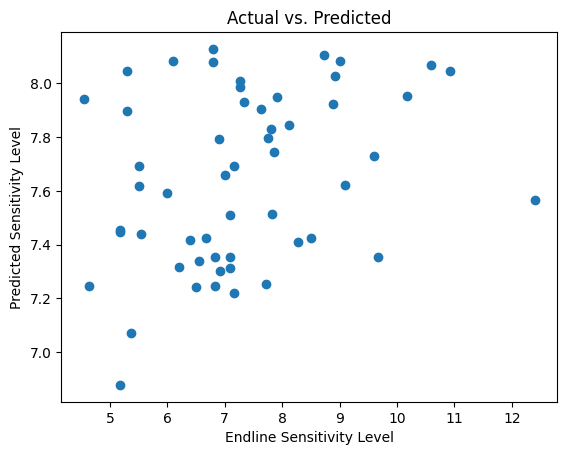

In [ ]:
# make a scatter plot to compare the actual prices vs. the predicted prices
_ = plt.scatter(y3_test, predictions)
_ = plt.xlabel("Endline Sensitivity Level")
_ = plt.ylabel("Predicted Sensitivity Level")
_ = plt.title("Actual vs. Predicted")

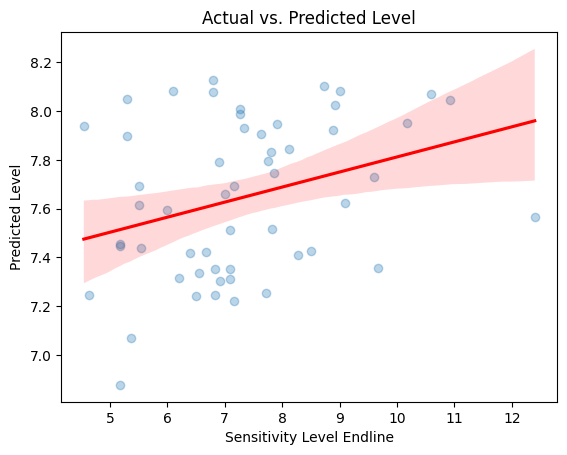

In [ ]:
_ = sns.regplot(x=y3_test,
                y=predictions,
                scatter_kws={'alpha':0.3},  # make the scatter points have some transparency
                line_kws={'color':'red'})   # change regression line color

_ = plt.xlabel("Sensitivity Level Endline")
_ = plt.ylabel("Predicted Level")
_ = plt.title("Actual vs. Predicted Level")

In [ ]:
# compute R-squared for our regression model using r2-score()
from sklearn.metrics import r2_score
r2_3 = r2_score(y3_test, predictions)
print(r2_3)

0.04342523091017236


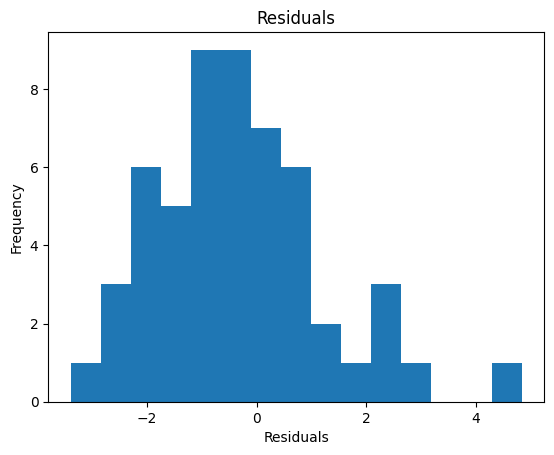

In [ ]:
_ = plt.hist(y3_test - predictions, bins=15)
_= plt.xlabel("Residuals")
_= plt.ylabel("Frequency")
_= plt.title("Residuals")

In [ ]:
# first import the metrics module
from sklearn import metrics

# then call the mean_absolute_error function
mae = metrics.mean_absolute_error(y3_test, predictions)

# call mean_squared_error
mse = metrics.mean_squared_error(y3_test, predictions)

# root mean squared error is the square root of mean_squared_error
# you could do that by hand or call metrics.root_mean_squared_error()
rmse = metrics.root_mean_squared_error(y3_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1.250060467696686
MSE: 2.5676081347588147
RMSE: 1.602375778261396


In [ ]:
import statsmodels.api as sm

X3 = X3.reset_index(drop=True)  # Reset index of X and drop the old index
y3 = y3.reset_index(drop=True)  # Reset index of y and drop the old index

#add constant to predictor variables
x3 = sm.add_constant(X3)

#fit linear regression model
model = sm.OLS(y3, X3).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          e_sensitivity   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.020
Method:                 Least Squares   F-statistic:                             0.1231
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                       0.974
Time:                        17:33:01   Log-Likelihood:                         -624.29
No. Observations:                 180   AIC:                                      1257.
Df Residuals:                     176   BIC:                                      1269.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------